In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cupy as cp
import pathlib
import pickle
import sys

In [7]:
sys.path.append(str(pathlib.Path('../').resolve()))
from lib.utils.misc import to_cpu

In [8]:
# Load the pre-trained VGG8B model on FashionMNIST dataset
model = pickle.load(open('model.pkl', 'rb'))

In [9]:
# Remove seaborn style
plt.style.use('default')

In [13]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
layers = model.get_layers_with_parameters()
layers_weights = [to_cpu(layer.weights.flatten()) for layer in layers]

In [14]:
params = {
   'font.size': 22,
   'axes.linewidth': 1.25,
   'axes.labelsize': 22,
   'legend.fontsize': 22,
   'xtick.labelsize': 22,
   'ytick.labelsize': 22,
}
plt.rcParams.update(params)

In [15]:
y_labels = []
for i in range(len(layers_weights) - 1):
    if i % 2 == 0:
        y_labels.append(f"Forward Conv2D #{i // 2 + 1}")
    else:
        y_labels.append(f"Learning Linear #{i // 2 + 1}")
y_labels.append("Output Linear")

In [16]:
title = 'Distribution of weights across layers in VGG8B'
x_label = 'Absolute value of the weights'
x_ticks = [2**i for i in range(1, 16, 2)]
x_labels = [r'$2^{' + str(i) + '}$' for i in range(1, 16, 2)]

In [17]:
from palettable.colorbrewer.qualitative import Set2_8
lrn_colors = Set2_8.mpl_colors

In [18]:
# For each color in colors, obtain a slightly darker version of it   
fwd_colors = []
for color in lrn_colors[:-1]:
    fwd_colors.append(tuple(np.array(color) * 0.8))
# Alternate elements from fwd_colors and lrn_colors
palette = [color for pair in zip(fwd_colors, lrn_colors) for color in pair] + [lrn_colors[-1]]

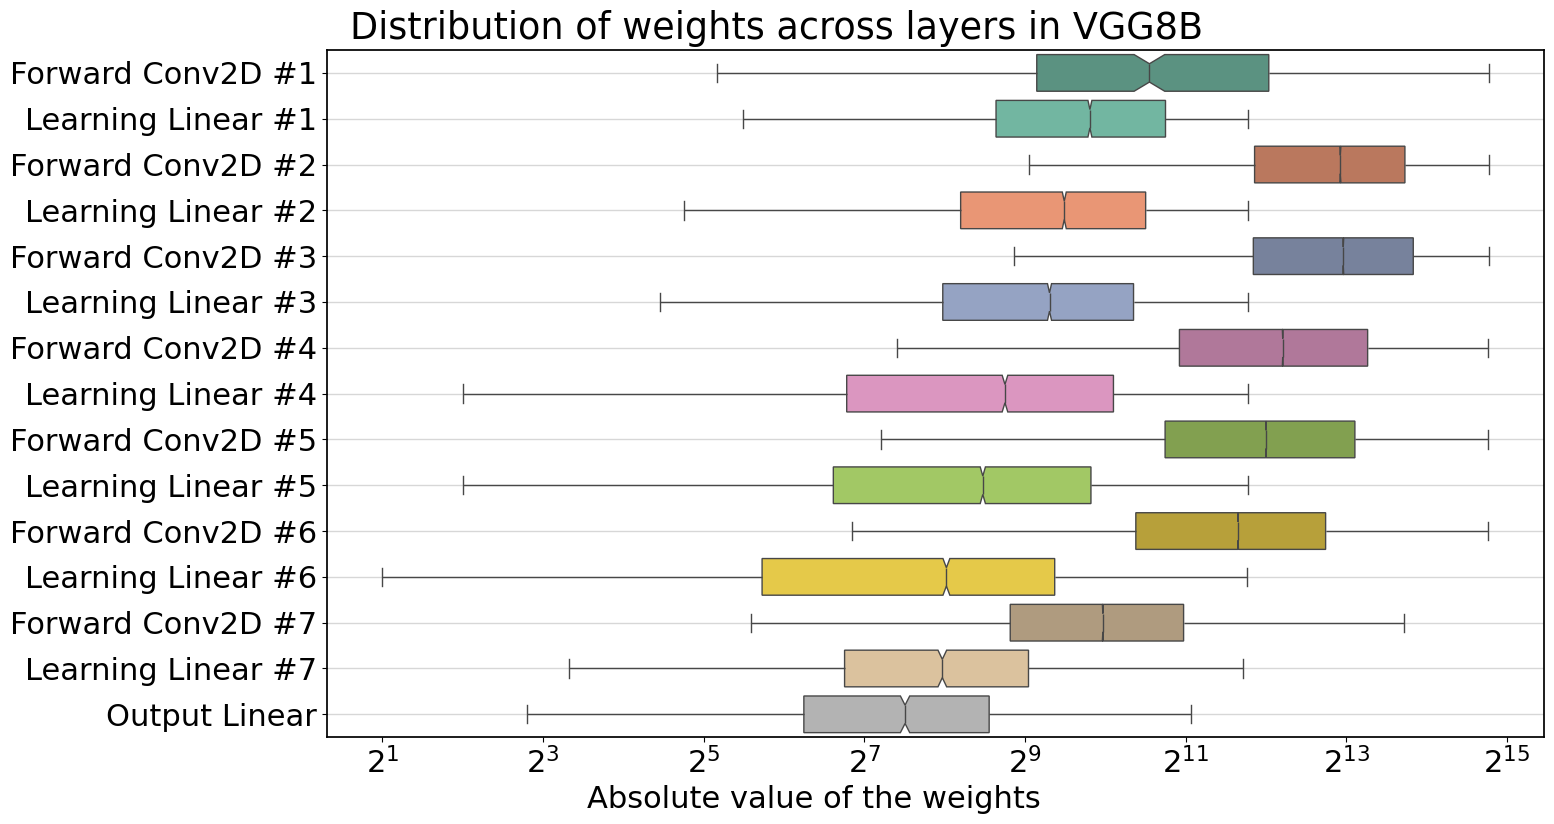

In [19]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.boxplot(data=layers_weights, ax=ax, showfliers=False, log_scale=2, orient='h', notch=True, palette=palette)
plt.suptitle(title, position=(0.5, 0.93))
ax.set_xlabel(x_label, x=0.4)
ax.set_xticks(ticks=x_ticks, labels=x_labels)
ax.set_yticks(ticks=np.arange(len(layers)), labels=y_labels)
plt.grid(linewidth=1, alpha=0.5, axis='y')
plt.tight_layout()
plt.savefig('boxplot_vgg8b.pdf')